# 模型效果对比

In [1]:
!export HF_ENDPOINT=https://hf-mirror.com

In [2]:
from transformers import pipeline, Pipeline, logging
import pandas as pd

logging.set_verbosity_error()

## 1. 情感分析

In [3]:
task: str = "sentiment-analysis"

text_list: list[str] = [
    "今儿上海可真冷啊",
    "我觉得这家店蒜泥白肉的味道一般",
    "你学东西真的好快，理论课一讲就明白了",
]

In [4]:
sa_pipeline: Pipeline = pipeline(
    task,
    model="finiteautomata/bertweet-base-sentiment-analysis",
    revision="924fc4c",
    device="mps"
)

result_list = []

for text in text_list:
    result = sa_pipeline(text)[0]
    result_list.append({
        "测试文本": text,
        "标签": result['label'],
        "分数": result['score']
    })

pd.DataFrame(result_list)

,测试文本,标签,分数
0,今儿上海可真冷啊,NEU,0.955227
1,我觉得这家店蒜泥白肉的味道一般,NEU,0.957250
2,你学东西真的好快，理论课一讲就明白了,NEU,0.960521


In [5]:
sa_pipeline: Pipeline = pipeline(
    task,
    model="ProsusAI/finbert",
    revision="4556d13",
    device="mps"
)

result_list = []

for text in text_list:
    result = sa_pipeline(text)[0]
    result_list.append({
        "测试文本": text,
        "标签": result['label'],
        "分数": round(result["score"], 4),
    })

pd.DataFrame(result_list)

,测试文本,标签,分数
0,今儿上海可真冷啊,neutral,0.9098
1,我觉得这家店蒜泥白肉的味道一般,neutral,0.9019
2,你学东西真的好快，理论课一讲就明白了,neutral,0.8865


## 2. Token分类

In [6]:
task: str = "token-classification"

text_list: list[str] = [
    "Hugging Face is a French company based in New York City.",
]

In [7]:
tc_pipeline: Pipeline = pipeline(
    task,
    model="dslim/bert-base-NER",
    revision="5271995",
    device="mps",
    aggregation_strategy="simple"
)

result_list = []

for text in text_list:
    pred_list = tc_pipeline(text)
    for pred in pred_list:
        result_list.append({
            "标签": pred["entity_group"],
            "分数": round(pred["score"], 4),
            "文本": pred["word"],
        })

pd.DataFrame(result_list)

,标签,分数,文本
0,ORG,0.9287,Hugging Face
1,MISC,0.9996,French
2,LOC,0.9995,New York City


In [8]:
tc_pipeline: Pipeline = pipeline(
    task,
    model="FacebookAI/xlm-roberta-large-finetuned-conll03-english",
    revision="18f95e9",
    device="mps",
    aggregation_strategy="simple"
)

result_list = []

for text in text_list:
    pred_list = tc_pipeline(text)
    for pred in pred_list:
        result_list.append({
            "标签": pred["entity_group"],
            "分数": round(pred["score"], 4),
            "文本": pred["word"],
        })

pd.DataFrame(result_list)

,标签,分数,文本
0,ORG,0.9999,Hugging Face
1,MISC,1.0000,French
2,LOC,1.0000,New York City


## 3. QA

In [9]:
task: str = "question-answering"

text_list: list[dict[str, str]] = [
    {
        "question": "What is the name of the repository?",
        "context": "The name of the repository is huggingface/transformers"
    },
    {
        "question": "What is the capital of China?",
        "context": "On 1 October 1949, CCP Chairman Mao Zedong formally proclaimed the People's Republic of China in Tiananmen Square, Beijing."
    }
]

In [10]:
qa_pipeline: Pipeline = pipeline(
    task,
    model="deepset/roberta-base-squad2",
    revision="cbf50ba",
    device="mps"
)

result_list = []

for text in text_list:
    prediction = qa_pipeline(**text)
    print(prediction["answer"], prediction["score"])

huggingface/transformers 0.9068419337272644
Beijing 0.7503764033317566


## 4. 文本摘要

In [11]:
task: str = "summarization"

text_list: list[str] = [
    """
        In this work, we presented the Transformer, the first sequence transduction model based entirely on attention,
        replacing the recurrent layers most commonly used in encoder - decoder architectures
        with multi - headed self-attention.
        For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers.
        On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art.
        In the former task our best model outperforms even all previously reported ensembles.
    """,
    """
       Large language models (LLM) are very large deep learning models that are pre-trained on vast amounts of data. 
       The underlying transformer is a set of neural networks that consist of an encoder and a decoder with self-attention capabilities. 
       The encoder and decoder extract meanings from a sequence of text and understand the relationships between words and phrases in it.
       Transformer LLMs are capable of unsupervised training, although a more precise explanation is that transformers perform self-learning. 
       It is through this process that transformers learn to understand basic grammar, languages, and knowledge.
       Unlike earlier recurrent neural networks (RNN) that sequentially process inputs, transformers process entire sequences in parallel. 
       This allows the data scientists to use GPUs for training transformer-based LLMs, significantly reducing the training time.
    """
]

In [12]:
sm_pipeline: Pipeline = pipeline(
    task=task,
    model="Falconsai/text_summarization",
    revision="6e505f9",
)

for text in text_list:
    prediction = sm_pipeline(text)
    print(prediction)

[{'summary_text': 'Transformer is the first sequence transduction model based entirely on attention . For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers .'}]
[{'summary_text': 'Large language models (LLM) are very large deep learning models that are pre-trained on vast amounts of data . The underlying transformer is a set of neural networks that consist of an encoder and a decoder with self-attention capabilities . Transformer LLMs are capable of unsupervised training .'}]


## 5. 音频分类

In [13]:
task = "audio-classification"

classifier: Pipeline = pipeline(
    task=task,
    model="MattyB95/AST-VoxCelebSpoof-Synthetic-Voice-Detection",
    revision="507e45b",
    device="mps"
)
pred = classifier("../data/mlk.flac")
pd.DataFrame(pred)

/Users/shixiufeng/opt/anaconda3/envs/llm-fine-tuning/lib/python3.10/site-packages/transformers/audio_utils.py:297: UserWarning: At least one mel filter has all zero values. The value for `num_mel_filters` (128) may be set too high. Or, the value for `num_frequency_bins` (256) may be set too low.
  warnings.warn(


,score,label
0,1.0,Bonafide
1,0.0,Spoof


## 6. ASR

In [14]:
transcriber: Pipeline = pipeline(
    task="automatic-speech-recognition",
    model="openai/whisper-base",
    revision="e37978b"
)

print(transcriber("../data/mlk.flac"))

/Users/shixiufeng/opt/anaconda3/envs/llm-fine-tuning/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:480: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


## 7. 图像分类

In [15]:
from transformers import pipeline

classifier = pipeline(
    task="image-classification",
    model="google/vit-base-patch16-224",
    revision="3f49326"
)

pred = classifier(
    "../data/panda.jpg"
)
pd.DataFrame(pred)

,label,score
0,"giant panda, panda, panda bear, coon bear, Ail...",0.996182
1,"lesser panda, red panda, panda, bear cat, cat ...",0.001782
2,"ice bear, polar bear, Ursus Maritimus, Thalarc...",0.000156
3,"sloth bear, Melursus ursinus, Ursus ursinus",0.000118
4,"brown bear, bruin, Ursus arctos",0.000076


# 8. 目标检测

In [16]:
detector = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50",
    revision="1d5f47b"
)
pred = detector(
    "../data/cat_dog.jpg"
)
pred

[{'score': 0.9984685778617859,
  'label': 'cat',
  'box': {'xmin': 78, 'ymin': 57, 'xmax': 309, 'ymax': 371}},
 {'score': 0.9890327453613281,
  'label': 'dog',
  'box': {'xmin': 279, 'ymin': 20, 'xmax': 482, 'ymax': 416}}]

In [17]:
from PIL import Image, ImageDraw

with Image.open("../data/cat_dog.jpg") as im:
    draw: ImageDraw = ImageDraw.Draw(im)
    for obj in pred:
        x_min: int = obj['box']["xmin"]
        x_max: int = obj['box']["xmax"]
        y_min: int = obj['box']["ymin"]
        y_max: int = obj['box']["ymax"]
        label: str = obj["label"]
        score: float = round(obj['score'], 2)
        draw.rectangle(((x_min, y_min), (x_max, y_max)), outline="red")
        draw.text((x_min, y_min), f"{label}(score={score})", fill="black", font_size=12)
    im.save("../data/obj_box.png", "PNG")

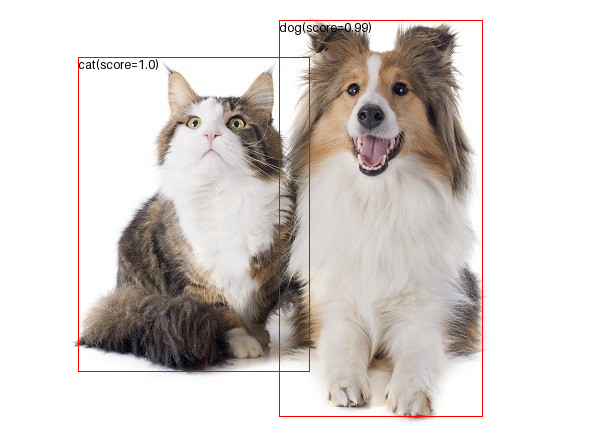

In [18]:
from IPython import display

display.Image("../data/obj_box.png")